# Notebook A: Mechalis Menton Fitting

### Setup imports

In [2]:
import pandas as pd
from scipy.optimize import curve_fit 
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

### Load phenol data

In [3]:
phenol_hrp_to_peroxide_ratio_df = pd.read_csv('../data/phenol_hrp_to_peroxide_ratio.csv')

phenol_hrp_to_peroxide_ratio_df

,time,0.5:1 hrp:peroxide phe 1,0.5:1 hrp:peroxide phe 2,1:1 hrp:peroxide phe 1,1:1 hrp:peroxide phe 2,2:1 hrp:peroxide phe 1,2:1 hrp:peroxide phe 2
0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,0.839378,0.868421,0.839378,0.891192,0.818182,0.856410
2,5,0.917098,0.794737,0.616580,0.746114,0.580808,0.676923
3,10,0.922280,0.905263,0.564767,0.683938,0.479798,0.569231
4,20,0.880829,0.889474,0.445596,0.533679,0.404040,0.435897
5,30,0.901554,0.889474,0.564767,0.497409,0.363636,0.446154
6,45,0.901554,0.873684,0.580311,0.461140,0.282828,0.353846
7,60,0.854922,0.873684,0.652850,0.419689,0.303030,0.384615
8,90,0.823834,0.847368,0.487047,0.492228,0.257576,0.317949


### Create a smoothed dataframe with slope and values

In [26]:
# Create new time points from 0 to 90 minutes (1-minute intervals)
new_time_points = np.arange(0, 91, 1)

# Create an empty DataFrame for the new interpolated and smoothed data
interpolated_df = pd.DataFrame({'time': new_time_points})

# Produce a linear interpolation of each column
for col in phenol_hrp_to_peroxide_ratio_df.columns[1:]:

    # first create linear interpolations between measured time points
    interpolation_func = interp1d(
        phenol_hrp_to_peroxide_ratio_df['time'], 
        phenol_hrp_to_peroxide_ratio_df[col], 
        kind='linear', 
        fill_value="extrapolate"
    )
    interpolated_values = interpolation_func(new_time_points)
    interpolated_df[col] = interpolated_values

# Apply the Savitzky-Golay filter to smooth the interpolated data
smoothed_df = pd.DataFrame({'time': new_time_points})

# Define the window length and polynomial order
window_length = 25  # Should be odd and larger for smoother curves
poly_order = 2

for col in interpolated_df.columns[1:]:
    smoothed_values = savgol_filter(interpolated_df[col], window_length, poly_order)
    smoothed_df[f'smoothed_{col}'] = smoothed_values

smoothed_df.head(10)

,time,smoothed_0.5:1 hrp:peroxide phe 1,smoothed_0.5:1 hrp:peroxide phe 2,smoothed_1:1 hrp:peroxide phe 1,smoothed_1:1 hrp:peroxide phe 2,smoothed_2:1 hrp:peroxide phe 1,smoothed_2:1 hrp:peroxide phe 2
0,0,0.902610,0.868550,0.882257,0.925312,0.867211,0.910213
1,1,0.904357,0.868200,0.838018,0.894827,0.817029,0.866788
2,2,0.905861,0.868014,0.796247,0.865542,0.769642,0.825485
3,3,0.907123,0.867993,0.756944,0.837459,0.725050,0.786303
4,4,0.908141,0.868136,0.720109,0.810576,0.683254,0.749243
5,5,0.908917,0.868444,0.685742,0.784893,0.644254,0.714305
6,6,0.909451,0.868916,0.653843,0.760411,0.608050,0.681488
7,7,0.909741,0.869552,0.624412,0.737130,0.574641,0.650793
8,8,0.909789,0.870353,0.597449,0.715049,0.544029,0.622220
9,9,0.909594,0.871318,0.572954,0.694169,0.516211,0.595768


### Plot the smoothed data points and measured datapoints

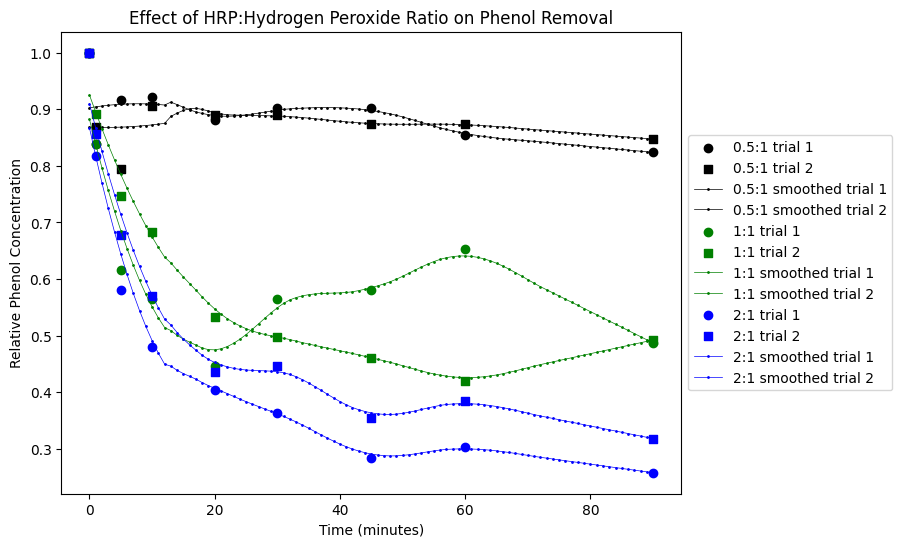

In [27]:
# Assuming smoothed_df and phenol_hrp_to_peroxide_ratio_df are already defined

measured_time = phenol_hrp_to_peroxide_ratio_df['time'].values
smoothed_time = smoothed_df['time'].values

plt.figure(figsize=(8, 6))

# 0.5:1 hrp:peroxide data and smoothed line
plt.scatter(measured_time, phenol_hrp_to_peroxide_ratio_df['0.5:1 hrp:peroxide phe 1'], color='black', label='0.5:1 trial 1', marker='o')
plt.scatter(measured_time, phenol_hrp_to_peroxide_ratio_df['0.5:1 hrp:peroxide phe 2'], color='black', label='0.5:1 trial 2', marker='s')
plt.plot(smoothed_time, smoothed_df['smoothed_0.5:1 hrp:peroxide phe 1'], color='black', linestyle='-', linewidth=.5, marker='o', markersize=1, label='0.5:1 smoothed trial 1')
plt.plot(smoothed_time, smoothed_df['smoothed_0.5:1 hrp:peroxide phe 2'], color='black', linestyle='-', linewidth=.5, marker='o', markersize=1, label='0.5:1 smoothed trial 2')

# 1:1 hrp:peroxide data and smoothed line
plt.scatter(measured_time, phenol_hrp_to_peroxide_ratio_df['1:1 hrp:peroxide phe 1'], color='green', label='1:1 trial 1', marker='o')
plt.scatter(measured_time, phenol_hrp_to_peroxide_ratio_df['1:1 hrp:peroxide phe 2'], color='green', label='1:1 trial 2', marker='s')
plt.plot(smoothed_time, smoothed_df['smoothed_1:1 hrp:peroxide phe 1'], color='green', linestyle='-', linewidth=.5, marker='o', markersize=1, label='1:1 smoothed trial 1')
plt.plot(smoothed_time, smoothed_df['smoothed_1:1 hrp:peroxide phe 2'], color='green', linestyle='-', linewidth=.5, marker='o', markersize=1, label='1:1 smoothed trial 2')

# 2:1 hrp:peroxide data and smoothed line
plt.scatter(measured_time, phenol_hrp_to_peroxide_ratio_df['2:1 hrp:peroxide phe 1'], color='blue', label='2:1 trial 1', marker='o')
plt.scatter(measured_time, phenol_hrp_to_peroxide_ratio_df['2:1 hrp:peroxide phe 2'], color='blue', label='2:1 trial 2', marker='s')
plt.plot(smoothed_time, smoothed_df['smoothed_2:1 hrp:peroxide phe 1'], color='blue', linestyle='-', linewidth=.5, marker='o', markersize=1, label='2:1 smoothed trial 1')
plt.plot(smoothed_time, smoothed_df['smoothed_2:1 hrp:peroxide phe 2'], color='blue', linestyle='-', linewidth=.5, marker='o', markersize=1, label='2:1 smoothed trial 2')

# Setting labels, title, and legend
plt.xlabel('Time (minutes)')
plt.ylabel('Relative Phenol Concentration')
plt.title('Effect of HRP:Hydrogen Peroxide Ratio on Phenol Removal')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


### Make a dataframe of enzymatic rates over time

In [28]:
# start the dataframe with by using the smoothed time column
rates_df = pd.DataFrame({'time': smoothed_df['time']})

# Use Savitzky-Golay filter to calculate the derivative (rate of change) of the phenol concentrations
window_length = 25  # Adjust as needed
poly_order = 2

for col in smoothed_df.columns[1:]:
    rate_values = savgol_filter(smoothed_df[col], window_length, poly_order, deriv=1)
    rates_df[f'rate_{col}'] = -1 * rate_values

rates_df

,time,rate_smoothed_0.5:1 hrp:peroxide phe 1,rate_smoothed_0.5:1 hrp:peroxide phe 2,rate_smoothed_1:1 hrp:peroxide phe 1,rate_smoothed_1:1 hrp:peroxide phe 2,rate_smoothed_2:1 hrp:peroxide phe 1,rate_smoothed_2:1 hrp:peroxide phe 2
0,0,-0.001363,-0.002262,0.043474,0.029695,0.046612,0.042591
1,1,-0.001172,-0.002198,0.041147,0.028604,0.044243,0.040614
2,2,-0.000981,-0.002134,0.038819,0.027513,0.041874,0.038638
3,3,-0.000790,-0.002070,0.036492,0.026422,0.039505,0.036661
4,4,-0.000598,-0.002007,0.034165,0.025331,0.037136,0.034685
...,...,...,...,...,...,...,...
86,86,0.001059,0.000867,0.005412,-0.002360,0.001483,0.002175
87,87,0.001065,0.000865,0.005384,-0.002347,0.001476,0.002163
88,88,0.001070,0.000863,0.005357,-0.002333,0.001468,0.002152
89,89,0.001076,0.000860,0.005329,-0.002319,0.001461,0.002141


### Make plot of enzymatic rate vs phenol concentration

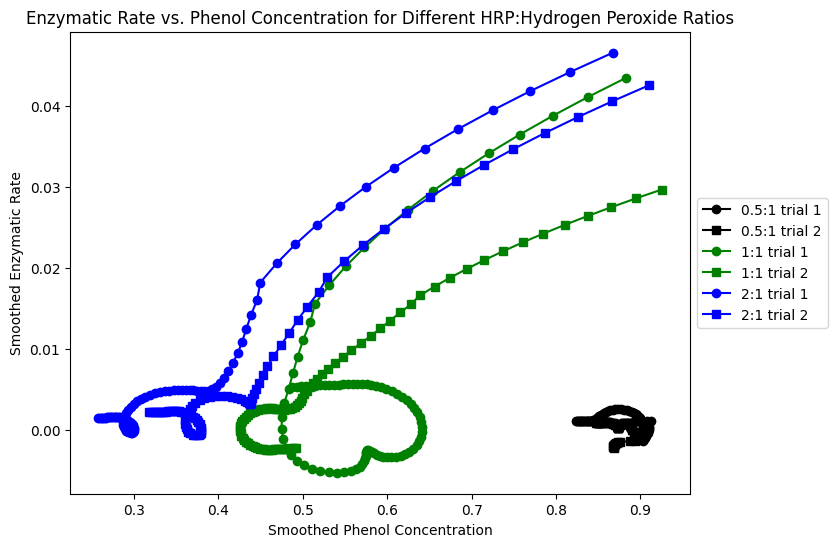

In [29]:
plt.figure(figsize=(8, 6))

# 0.5:1 hrp:peroxide
plt.plot(smoothed_df['smoothed_0.5:1 hrp:peroxide phe 1'], 
         rates_df['rate_smoothed_0.5:1 hrp:peroxide phe 1'], 
         'o-', color='black', label='0.5:1 trial 1')
plt.plot(smoothed_df['smoothed_0.5:1 hrp:peroxide phe 2'], 
         rates_df['rate_smoothed_0.5:1 hrp:peroxide phe 2'], 
         's-', color='black', label='0.5:1 trial 2')

# 1:1 hrp:peroxide
plt.plot(smoothed_df['smoothed_1:1 hrp:peroxide phe 1'], 
         rates_df['rate_smoothed_1:1 hrp:peroxide phe 1'], 
         'o-', color='green', label='1:1 trial 1')
plt.plot(smoothed_df['smoothed_1:1 hrp:peroxide phe 2'], 
         rates_df['rate_smoothed_1:1 hrp:peroxide phe 2'], 
         's-', color='green', label='1:1 trial 2')

# 2:1 hrp:peroxide
plt.plot(smoothed_df['smoothed_2:1 hrp:peroxide phe 1'], 
         rates_df['rate_smoothed_2:1 hrp:peroxide phe 1'], 
         'o-', color='blue', label='2:1 trial 1')
plt.plot(smoothed_df['smoothed_2:1 hrp:peroxide phe 2'], 
         rates_df['rate_smoothed_2:1 hrp:peroxide phe 2'], 
         's-', color='blue', label='2:1 trial 2')

# Setting labels, title, and legend
plt.xlabel('Smoothed Phenol Concentration')
plt.ylabel('Smoothed Enzymatic Rate')
plt.title('Enzymatic Rate vs. Phenol Concentration for Different HRP:Hydrogen Peroxide Ratios')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()